In [1]:
import pandas as pd

In [2]:
train = pd.read_csv(r"C:\Users\Lenovo\Documents\jupyter notebook DATA SCIENCE\ML project\train_LZdllcl.csv")

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [5]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [6]:
train['education'].fillna(train['education'].mode()[0],inplace=True)

In [7]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
train['previous_year_rating'].fillna(train['previous_year_rating'].mean(),inplace=True)

In [9]:
train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [10]:
train.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004364,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.059804,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.005710,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004364,-0.059804,0.005710,1.000000,0.000239,0.338134,0.026669,0.072065,0.153406
length_of_service,0.001274,-0.057275,0.657111,0.000239,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.338134,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.026669,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.072065,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.153406,-0.010670,0.221582,0.195871,0.181147,1.000000


# EDA

Importing required libraries

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [13]:
import numpy as np

Visualizing all numerical data and their distributions

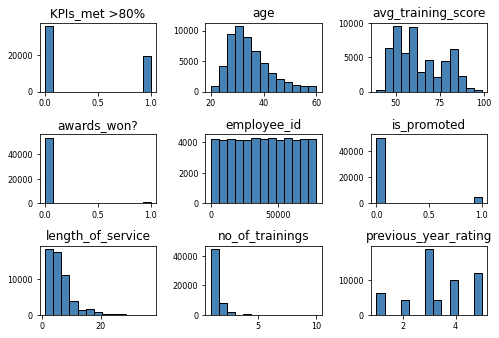

In [14]:
train.hist(color='steelblue',edgecolor='black',xlabelsize=8,ylabelsize=8,grid=False,bins=13)
plt.tight_layout(rect=(0,0,1.2,1.2))

Visualizing categorical data attributes

Which type of education most people have?

In [15]:
education_group=train.groupby('education').count()['is_promoted']
education_count=education_group.sort_values(ascending=False)
education_group.sort_values(ascending=False)

education
Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: is_promoted, dtype: int64

[]

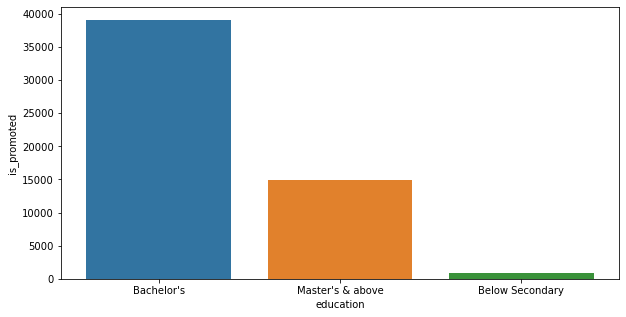

In [16]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=education_count.index,y=education_count)
plt.plot()

Which type of recruitement supplies most labour?

In [43]:
rec_group=train.groupby('recruitment_channel').count()['is_promoted']
rec_count=rec_group.sort_values(ascending=False)
rec_count.sort_values(ascending=False)

recruitment_channel
other       30446
sourcing    23220
referred     1142
Name: is_promoted, dtype: int64

[]

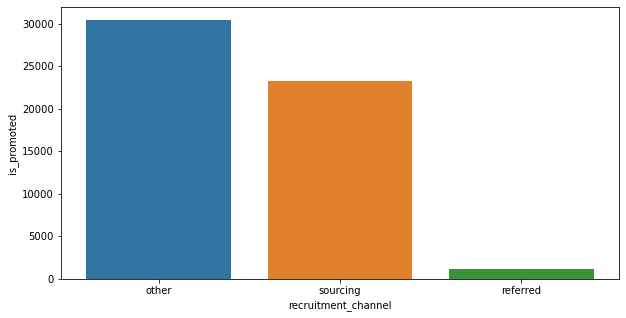

In [44]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=rec_count.index,y=rec_count)
plt.plot()

Which department holds the maximum people

In [17]:
department_count=train.groupby('department').count()['is_promoted'].sort_values(ascending=False)
train.groupby('department').count()['is_promoted'].sort_values(ascending=False)

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: is_promoted, dtype: int64

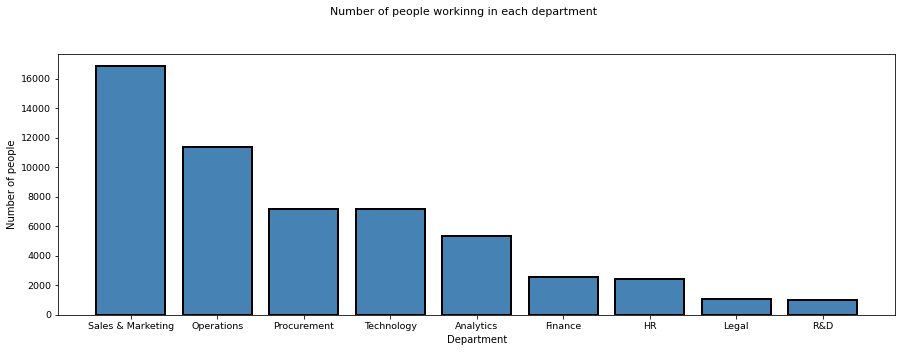

In [18]:
fig = plt.figure(figsize=(15,5))
title = fig.suptitle("Number of people workinng in each department",fontsize=11)
fig.subplots_adjust(top=0.85,wspace=0.3)
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Department")
ax.set_ylabel("Number of people")
d_t = train['department'].value_counts()
d_t = (list(d_t.index),list(d_t.values))
ax.tick_params(axis='both',which='major',labelsize=9.5)
bar = ax.bar(d_t[0],d_t[1],color='steelblue',edgecolor='black',linewidth=2)

Gender vs Education

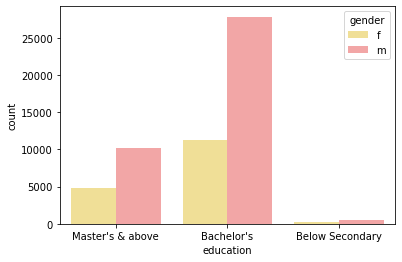

In [19]:
cp = sns.countplot(x = "education",hue = "gender",data=train,palette={"m":"#FF9999","f":"#FFE888"})

What lenth of work experience is mostly preferred inorder to get promoted?

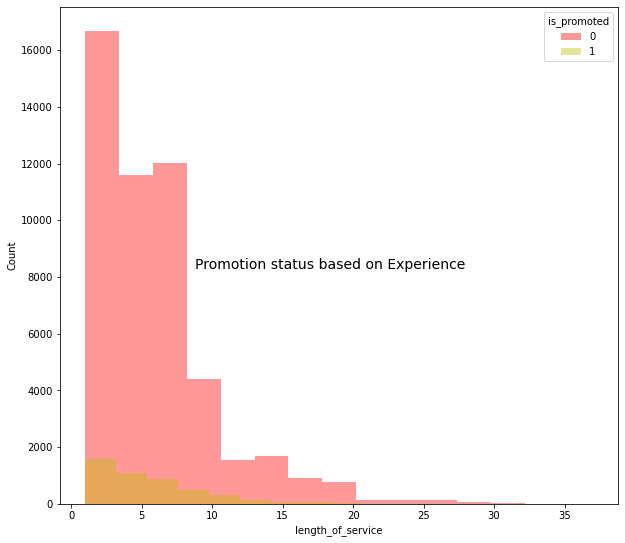

In [20]:
fig = plt.figure(figsize=(10,4))
title = fig.suptitle("Promotion status based on Experience",fontsize=14)
fig.subplots_adjust(top=1.85,wspace=0.3)
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Length of service")
ax.set_ylabel("Count")
g = sns.FacetGrid(train,hue="is_promoted",palette={0:"r",1:"y"})
g.map(sns.distplot,'length_of_service',kde = False,bins = 15,ax=ax)
ax.legend(title='is_promoted')
plt.close(2)

Correlation checking with Heatmap

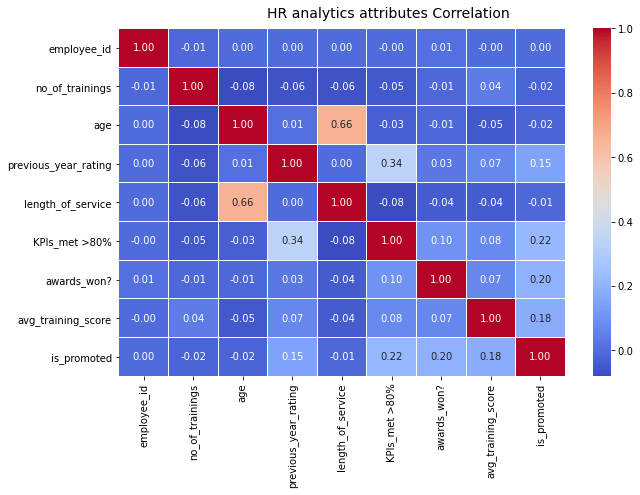

In [21]:
# Correlation matrix Heatmap
f,ax = plt.subplots(figsize=(10,6))
corr = train.corr()
hm = sns.heatmap(round(corr,2),annot=True,ax=ax,cmap="coolwarm",fmt=".2f",linewidth=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle("HR analytics attributes Correlation",fontsize=14)


Quartile values and Outliers checking

Text(0, 0.5, 'Average Training Score')

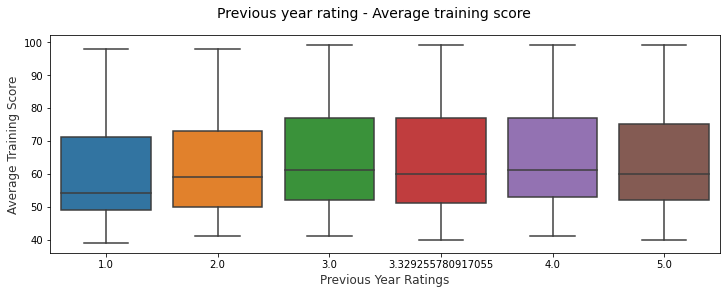

In [24]:
#Boxplot
f,(ax) = plt.subplots(1,1,figsize=(12,4))
f.suptitle("Previous year rating - Average training score",fontsize=14)

sns.boxplot(x="previous_year_rating",y="avg_training_score",data=train,ax=ax)
ax.set_xlabel("Previous Year Ratings",size=12,alpha=0.8)
ax.set_ylabel("Average Training Score",size=12,alpha=0.8)


In [26]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Text(0, 0.5, 'Average Training Score')

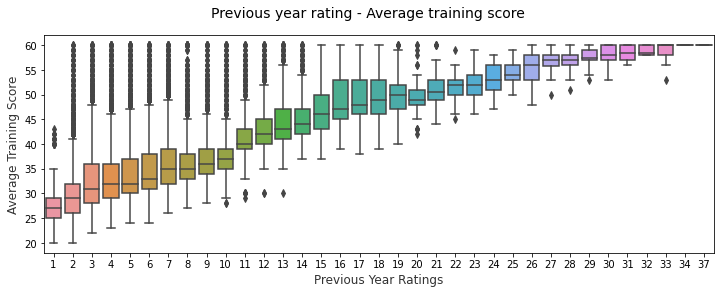

In [27]:
f,(ax) = plt.subplots(1,1,figsize=(12,4))
f.suptitle("Previous year rating - Average training score",fontsize=14)

sns.boxplot(x="length_of_service",y="age",data=train,ax=ax)
ax.set_xlabel("Previous Year Ratings",size=12,alpha=0.8)
ax.set_ylabel("Average Training Score",size=12,alpha=0.8)


In [28]:
train.head(
)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [29]:
#Removing the columns not needed for model training 
train_new = train.drop(["employee_id","region"],axis=1)

In [30]:
train_new.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [31]:
train_new.dtypes

department               object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [32]:
train_new['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [54]:
map_education =  {"Master's & above":2, "Bachelor's":1, "Below Secondary":0}
train_new['education']=train_new['education'].map(map_education)

In [35]:
train_new['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [36]:
train.groupby('department').count()['is_promoted'].sort_values(ascending=False)

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: is_promoted, dtype: int64

In [37]:
map_department = {'Sales & Marketing':8, 'Operations':7, 'Technology':6, 'Analytics':4,'R&D':0,'Procurement':5, 'Finance':3, 'HR':2, 'Legal':1}

In [55]:
train_new['department']=train_new['department'].map(map_department)

In [40]:
train_new['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [45]:
rec_map = {'sourcing':1, 'other':2, 'referred':0}

In [56]:
train_new['recruitment_channel']= train_new['recruitment_channel'].map(rec_map)

In [47]:
map_gender = {"m":1,"f":0}

In [57]:
train_new['gender'] = train_new['gender'].map(map_gender)

In [58]:
train_new.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8,2,0,1,1,35,5.0,8,1,0,49,0
1,7,1,1,2,1,30,5.0,4,0,0,60,0
2,8,1,1,1,1,34,3.0,7,0,0,50,0
3,8,1,1,2,2,39,1.0,10,0,0,50,0
4,6,1,1,2,1,45,3.0,2,0,0,73,0


In [59]:
train_new.dtypes

department                int64
education                 int64
gender                    int64
recruitment_channel       int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [60]:
# Savin the preprocessed data 
train_new.to_csv(r"C:\Users\Lenovo\Documents\jupyter notebook DATA SCIENCE\ML project\eda_data")